In [1]:
using Plots

In [2]:
function main()
     
    # IC
    topo = 10 # Topography --> related to ω
    ω = 2pi * topo/60
    x0 = 1 # Starting x-position
    v0 = -x0 * ω # Initial y-velocity
    u0 = 1 # Initial x-velocity
    
    
    # Equations: 
    
    x(t) = x0 * cos(ω * t) + u0 *sin(ω * t) / ω
    y(t) = v0 * sin(ω * t) / ω
    
    # Timeframe: 
    
    t = 0:0.1:6
    n = length(t) # making the time readable to a "for" statament (only integers)
    
    xpos = x.(t)
    ypos = y.(t)
    
    return xpos, ypos
    
end

main (generic function with 1 method)

In [3]:
xpos, ypos = main()

([1.0, 1.0943392251053532, 1.176688640655247, 1.2461460092201935, 1.301950341335306, 1.3434902330601246, 1.3703105646481308, 1.3821174869339314, 1.3787816408062052, 1.360339574493199  …  -0.18476906990825426, -0.04052042808848966, 0.10417216402085605, 0.24772342410176362, 0.38856057450875187, 0.5251405739498947, 0.6559670233701136, 0.7796065608123637, 0.8947045656311934, 0.9999999999999998], [-0.0, -0.10452846326765346, -0.20791169081775931, -0.30901699437494734, -0.40673664307580015, -0.4999999999999999, -0.587785252292473, -0.6691306063588581, -0.7431448254773941, -0.8090169943749475  …  0.8090169943749481, 0.7431448254773946, 0.6691306063588588, 0.5877852522924734, 0.5000000000000004, 0.40673664307580093, 0.3090169943749476, 0.20791169081775987, 0.10452846326765342, 2.4492935982947064e-16])

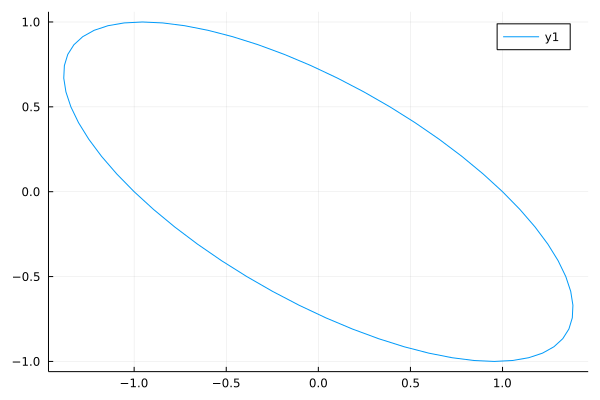

In [4]:
plot(xpos,ypos)

In [5]:
function main2()
     
    # IC
    topo = 10 # Topography --> related to ω
    ω = 2pi * topo/60
    x0 = 1 # Starting x-position
    v0 = -x0 * ω # Initial y-velocity
    u0 = 1 # Initial x-velocity
    
    
    # Equations: 
    
    x(t) = x0 * cos(ω * t) + u0 *sin(ω * t) / ω
    y(t) = v0 * sin(ω * t) / ω
    
    # Timeframe: 
    
    t = 0:0.1:6
    n = length(t) # making the time readable to a "for" statament (only integers)
    
    xpos = x.(t)
    ypos = y.(t)
    
    # Animation:
    
    anim = @animate for i in 1:n
        
        scatter([xpos[i]],[ypos[i]], legend = :none, title = "Trajectory", 
            makersize = 2, markercolor = "blue", 
            xaxis = ("x", (-1.5,1.5)), yaxis = ("y", (-1.5,1.5)),
            framestyle = :grid, aspect_ratio = 1, dpi = 300)
    end
    
    #gif(anim, "figures/animation.mp4", fps = 15)
    gif(anim, "figures/animation.gif", fps = 15)
end

main2 (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/arturo/Julia-Studies/Julia Basics/figures/animation.gif
└ @ Plots /home/arturo/.julia/packages/Plots/OeNV1/src/animation.jl:126


Plots.AnimatedGif("/home/arturo/Julia-Studies/Julia Basics/figures/animation.gif")
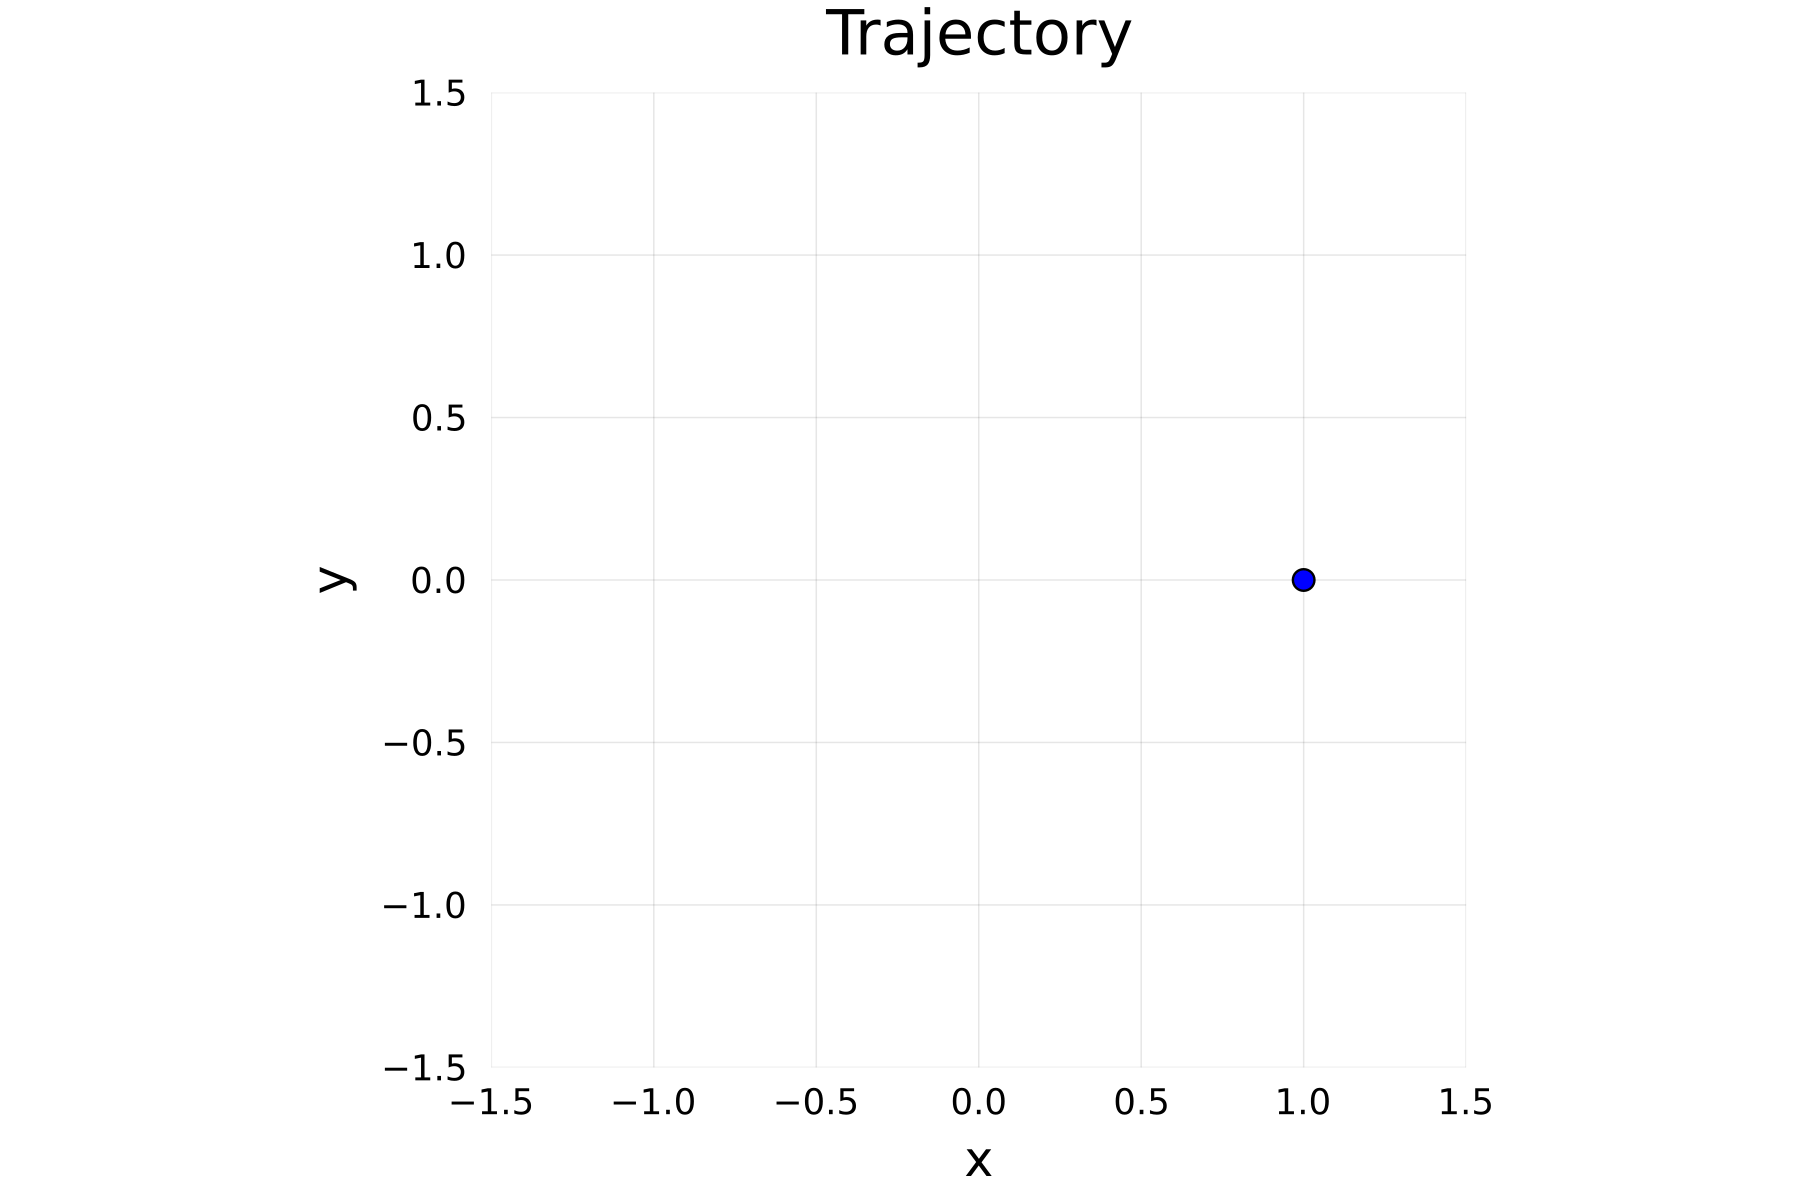

In [6]:
main2()

In [4]:
@userplot orbitain
@recipe function f!(var::orbitain)
    x, y = var.args
    title --> "Trajectory"
    xaxis --> ("x", (-1.5, 1.5))
    yaxis --> ("y", (-1.5, 1.5))
    markersize --> 2
    makercolor --> "black"
    seriestype --> :scatter
    legend --> :none
    framestyle --> :grid
    aspect_ratio --> 1
    dpi --> 300
    return [x], [y]
    #or return x, y. However in this case when calling orbitain function I would have to put the arguments in []
end


function main3()
     
    # IC
    topo = 10 # Topography --> related to ω
    ω = 2pi * topo/60
    x0 = 1 # Starting x-position
    v0 = -x0 * ω # Initial y-velocity
    u0 = 1 # Initial x-velocity
    
    
    # Equations: 
    
    x(t) = x0 * cos(ω * t) + u0 *sin(ω * t) / ω
    y(t) = v0 * sin(ω * t) / ω
    
    # Timeframe: 
    
    t = 0:0.1:6
    n = length(t) # making the time readable to a "for" statament (only integers)
    
    xpos = x.(t)
    ypos = y.(t)
    
    # Animation:
    
    anim = @animate for i in 1:n
        
        orbitain!(xpos[i],ypos[i], markercolor = :black)# SEE EXPLANATION IN RETURN ARGUMENT OF THE MACRO
        scatter!((0, 0),markercolor = :black)
    end
    
    
    #gif(anim, "figures/animation.mp4", fps = 15)
    gif(anim, "figures/animation_macro.gif", fps = 15)
end

main3 (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/arturo/Julia-Studies/Julia Basics/figures/animation_macro.gif
└ @ Plots /home/arturo/.julia/packages/Plots/OeNV1/src/animation.jl:126


Plots.AnimatedGif("/home/arturo/Julia-Studies/Julia Basics/figures/animation_macro.gif")
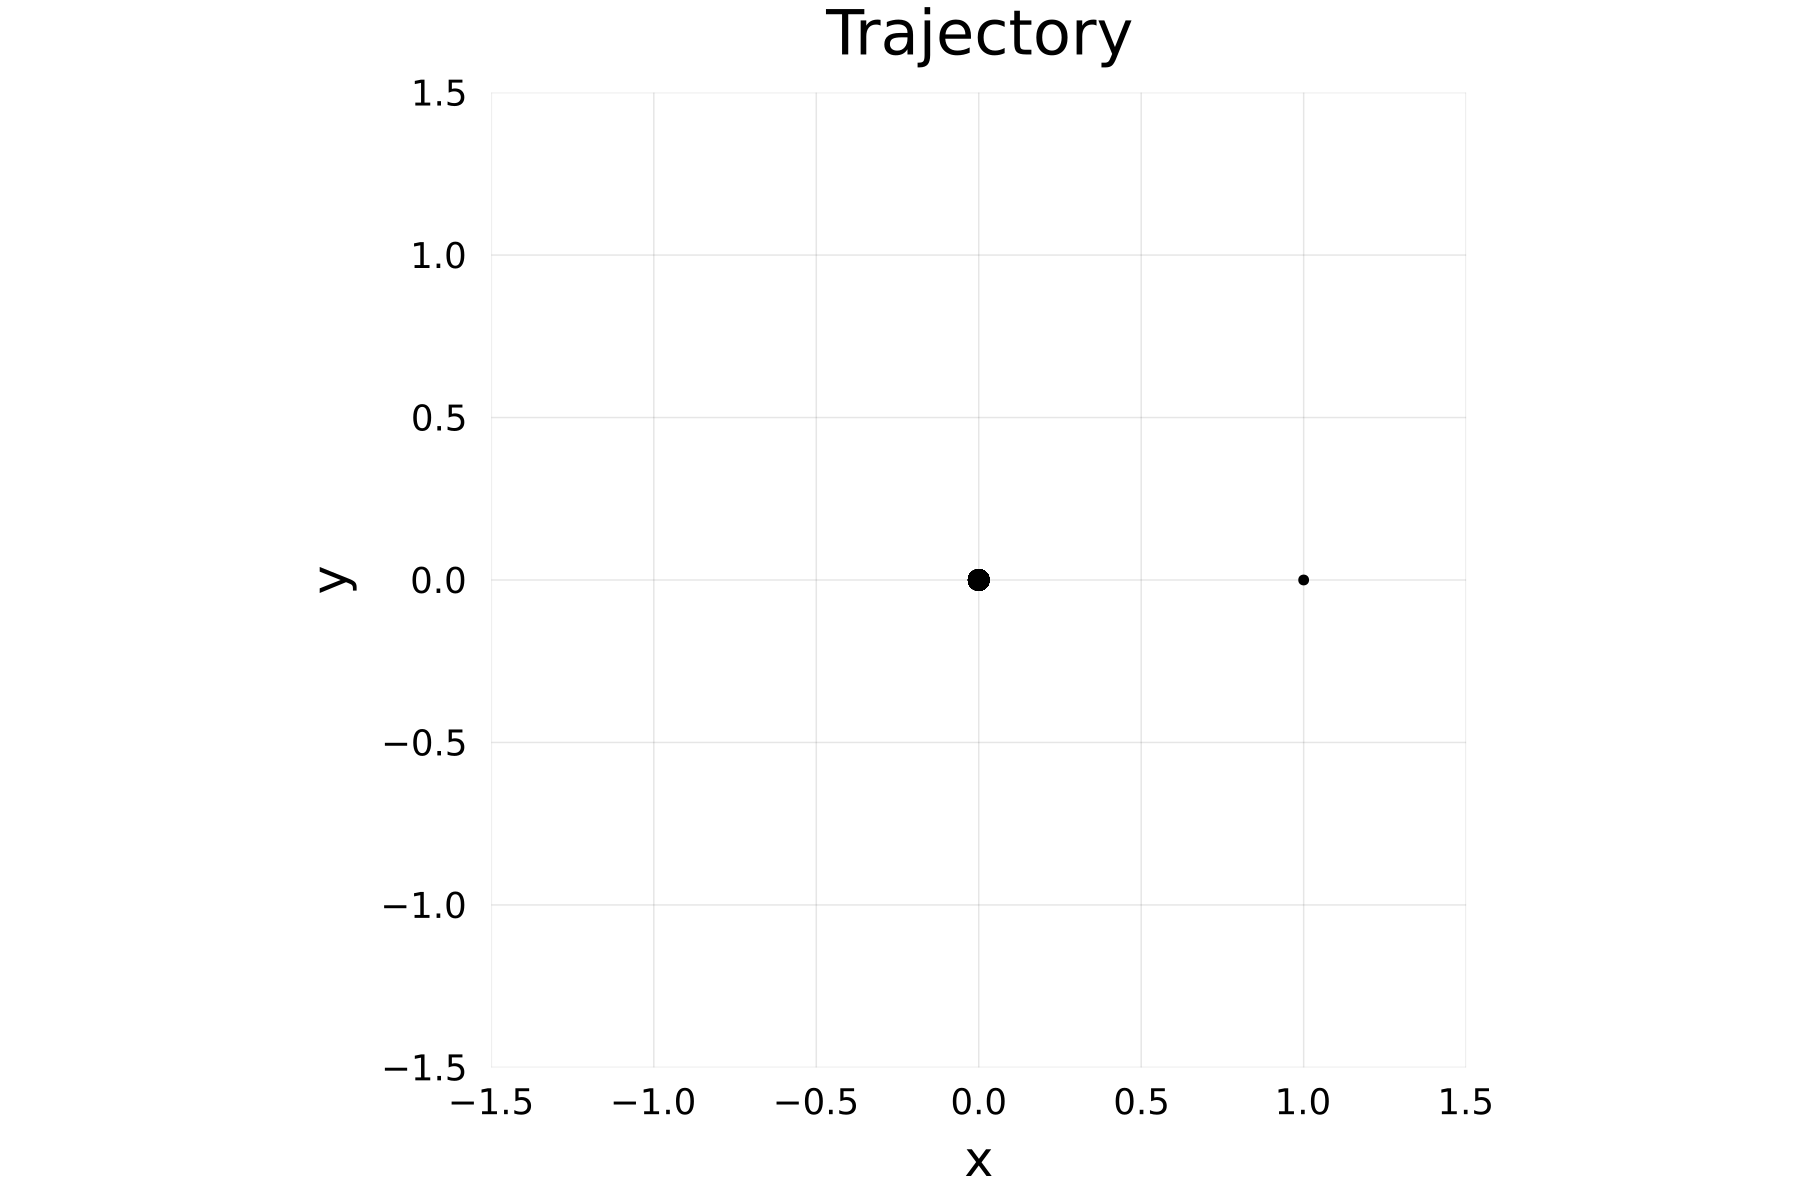

In [5]:
main3()